In [1]:
import os
import pandas as pd

In [2]:
!ls "../chicago/ridership"

daily  monthly


In [3]:
ridership_folder = "../chicago/ridership/daily"
ridership_files = os.listdir(ridership_folder)
ridership_files

['cta-ridership-bus-routes-daily-totals-by-route.csv',
 'cta-ridership-daily-boarding-totals.csv',
 'cta-ridership-l-station-entries-daily-totals.csv']

### There are 3 files containing "daily" information,can we combine these 3 files?

In [4]:
bus_daily_total = pd.read_csv(os.path.join(ridership_folder, ridership_files[0]))
bus_daily_total.head()

/tmp/ipykernel_12335/1714229132.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_daily_total = pd.read_csv(os.path.join(ridership_folder, ridership_files[0]))


,route,date,daytype,rides
0,1,2019-06-28T00:00:00.000,W,1476
1,1,2019-06-27T00:00:00.000,W,2007
2,1,2019-06-26T00:00:00.000,W,1748
3,1,2019-06-25T00:00:00.000,W,1927
4,1,2019-06-24T00:00:00.000,W,1727


In [5]:
bus_daily_total = bus_daily_total.sort_values(by=['date']).reset_index(drop=True)
print(bus_daily_total.iloc[0,1],bus_daily_total.iloc[-1,1])

2001-01-01T00:00:00.000 2019-06-30T00:00:00.000


In [6]:
bus_daily_total.head()

,route,date,daytype,rides
0,43,2001-01-01T00:00:00.000,U,311
1,36,2001-01-01T00:00:00.000,U,7044
2,145,2001-01-01T00:00:00.000,U,1379
3,81W,2001-01-01T00:00:00.000,U,200
4,30,2001-01-01T00:00:00.000,U,600


看起來這個資料是每天的各個公車路線有多少人流 (This table shows how many rider per route per day)

In [7]:
daily_boarding = pd.read_csv(os.path.join(ridership_folder, ridership_files[1]))
daily_boarding.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01T00:00:00.000,U,297192,126455,423647
1,2001-01-02T00:00:00.000,W,780827,501952,1282779
2,2001-01-03T00:00:00.000,W,824923,536432,1361355
3,2001-01-04T00:00:00.000,W,870021,550011,1420032
4,2001-01-05T00:00:00.000,W,890426,557917,1448343


這個資料看起來是每天有多少人搭巴士、多少人搭火車、兩個加起來總共有多少人流（This table shows 3 types of rides per day, which are how many people take buses, how many people take trains, and total number of people.）

In [8]:
station_daily_total = pd.read_csv(os.path.join(ridership_folder, ridership_files[2]))
station_daily_total.head()

,station_id,stationname,date,daytype,rides
0,40350,UIC-Halsted,2001-01-01T00:00:00.000,U,273
1,41130,Halsted-Orange,2001-01-01T00:00:00.000,U,306
2,40760,Granville,2001-01-01T00:00:00.000,U,1059
3,40070,Jackson/Dearborn,2001-01-01T00:00:00.000,U,649
4,40090,Damen-Brown,2001-01-01T00:00:00.000,U,411


這個看起來是每個火車站每天的人流(This table shows how many rides per station per day)

#### We combine `bus_daily_total` and `station_daily_total`

In [9]:
bus_daily_total.shape, station_daily_total.shape

((824291, 4), (962546, 5))

It seems the combined data is very large, my laptop is unable to process it. So let's use 'half' of each frame. The definition of half is by the date.

In [10]:
for_time_process = bus_daily_total.copy()
for_time_process['timestamp'] = pd.to_datetime(for_time_process['date'])
for_time_process['year'] = for_time_process.timestamp.dt.year
for_time_process['month'] =  for_time_process.timestamp.dt.month
for_time_process.head()

,route,date,daytype,rides,timestamp,year,month
0,43,2001-01-01T00:00:00.000,U,311,2001-01-01,2001,1
1,36,2001-01-01T00:00:00.000,U,7044,2001-01-01,2001,1
2,145,2001-01-01T00:00:00.000,U,1379,2001-01-01,2001,1
3,81W,2001-01-01T00:00:00.000,U,200,2001-01-01,2001,1
4,30,2001-01-01T00:00:00.000,U,600,2001-01-01,2001,1


In [11]:
print(for_time_process.year.value_counts().reset_index().sort_values(by=['year']))

    year  count
13  2001  42434
10  2002  43184
9   2003  44157
5   2004  45657
4   2005  46276
3   2006  47070
0   2007  48826
1   2008  48521
2   2009  48109
6   2010  45201
7   2011  44782
8   2012  44730
11  2013  43002
16  2014  42198
14  2015  42370
12  2016  42549
15  2017  42294
17  2018  42110
18  2019  20821


#### Let's select data from 2015 to 2019

In [12]:
type(for_time_process.loc[0,'date'])

str

In [13]:
bus_daily_total['date'] = pd.to_datetime(bus_daily_total['date'])
station_daily_total['date'] = pd.to_datetime(station_daily_total['date'])

start_date, end_date = pd.to_datetime('2015-01-01'), pd.to_datetime('2019-12-31')

bus_daily_total = bus_daily_total[(bus_daily_total['date'] >= start_date) & (bus_daily_total['date'] <= end_date)].reset_index(drop=True)
station_daily_total = station_daily_total[(station_daily_total['date'] >= start_date) & (station_daily_total['date'] <= end_date)].reset_index(drop=True)

Meaning of `route` of `bus_daily_total` is the same as meaning of `station_id` of `station_daily_total`, so we'll rename the column first and then concat 2 dataframes vertically.

In [14]:
# check id overlapping
bus_ids = bus_daily_total.route.unique()
station_ids = station_daily_total.station_id.unique()
list(set(bus_ids) & set(station_ids))

[]

In [15]:
bus_daily = bus_daily_total.copy()
station_daily = station_daily_total.copy()

bus_daily = bus_daily.rename(columns={'route':'id'})
station_daily = station_daily.rename(columns={'station_id':'id'})

# add a tag, `transportation`
bus_daily['transportation'] = ['bus']*len(bus_daily)
station_daily['transportation'] = ['train']*len(station_daily)

station_daily = station_daily.drop(columns=['stationname'])

In [16]:
bus_daily.head()

,id,date,daytype,rides,transportation
0,172,2015-01-01,U,123,bus
1,79,2015-01-01,U,13392,bus
2,71,2015-01-01,U,4460,bus
3,56,2015-01-01,U,2501,bus
4,54B,2015-01-01,U,1274,bus


In [17]:
station_daily.head()

,id,date,daytype,rides,transportation
0,40570,2015-01-01,U,2344,train
1,41330,2015-01-01,U,763,train
2,40310,2015-01-01,U,1029,train
3,41010,2015-01-01,U,528,train
4,41290,2015-01-01,U,1526,train


In [18]:
bus_station_daily_total = pd.concat([bus_daily, station_daily], axis=0)
bus_station_daily_total.head()

,id,date,daytype,rides,transportation
0,172,2015-01-01,U,123,bus
1,79,2015-01-01,U,13392,bus
2,71,2015-01-01,U,4460,bus
3,56,2015-01-01,U,2501,bus
4,54B,2015-01-01,U,1274,bus


### Build feature based on the dataframe and our observations

In [19]:
df = bus_station_daily_total.copy()

In [20]:
# ======= TEMPORAL FEATURES =======
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.dayofweek  # Monday=0, Sunday=6
df["week_of_year"] = df["date"].dt.isocalendar().week

# Convert daytype into categorical variables
df["is_weekday"] = df["daytype"].apply(lambda x: 1 if x == "W" else 0)  # Weekday = 1, else 0
df["is_saturday"] = df["daytype"].apply(lambda x: 1 if x == "A" else 0)  # Saturday = 1, else 0
df["is_holiday"] = df["daytype"].apply(lambda x: 1 if x == "U" else 0)  # Holiday = 1, else 0

# ======= TRANSPORTATION TYPE FEATURE =======
df["is_bus"] = df["transportation"].apply(lambda x: 1 if x == "bus" else 0)  # Bus = 1, Train = 0

df.head()

,id,date,daytype,rides,transportation,year,month,day_of_week,week_of_year,is_weekday,is_saturday,is_holiday,is_bus
0,172,2015-01-01,U,123,bus,2015,1,3,1,0,0,1,1
1,79,2015-01-01,U,13392,bus,2015,1,3,1,0,0,1,1
2,71,2015-01-01,U,4460,bus,2015,1,3,1,0,0,1,1
3,56,2015-01-01,U,2501,bus,2015,1,3,1,0,0,1,1
4,54B,2015-01-01,U,1274,bus,2015,1,3,1,0,0,1,1


In [21]:
# ======= TREND FEATURES =======
df = df.sort_values(by=["id", "date"])  # Ensure sorting by station and date

# Rolling statistics (7-day & 30-day moving averages)
df["rides_rolling_7"] = df.groupby("id")["rides"].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df["rides_rolling_30"] = df.groupby("id")["rides"].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Lag features (previous day's ridership) : lag feature help to understand how past value influence future value
df["rides_lag_1"] = df.groupby("id")["rides"].shift(1)
df["rides_lag_7"] = df.groupby("id")["rides"].shift(7)
df["rides_lag_30"] = df.groupby("id")["rides"].shift(30)

# Yearly ridership change rate
df["yearly_change"] = df.groupby("id")["rides"].pct_change(periods=365)  # Year-over-year change


In [22]:
# ======= INTERACTION FEATURES =======
df["month_transportation"] = df["month"].astype(str) + "_" + df["transportation"]
df["daytype_transportation"] = df["daytype"].astype(str) + "_" + df["transportation"]

In [23]:
df.head()

,id,date,daytype,rides,transportation,year,month,day_of_week,week_of_year,is_weekday,...,is_holiday,is_bus,rides_rolling_7,rides_rolling_30,rides_lag_1,rides_lag_7,rides_lag_30,yearly_change,month_transportation,daytype_transportation
151,2,2015-01-02,W,1666,bus,2015,1,4,1,1,...,0,1,1666.0,1666.0,NaN,NaN,NaN,NaN,1_bus,W_bus
454,2,2015-01-05,W,3121,bus,2015,1,0,2,1,...,0,1,2393.5,2393.5,1666.0,NaN,NaN,NaN,1_bus,W_bus
573,2,2015-01-06,W,3454,bus,2015,1,1,2,1,...,0,1,2747.0,2747.0,3121.0,NaN,NaN,NaN,1_bus,W_bus
762,2,2015-01-07,W,2507,bus,2015,1,2,2,1,...,0,1,2687.0,2687.0,3454.0,NaN,NaN,NaN,1_bus,W_bus
893,2,2015-01-08,W,2862,bus,2015,1,3,2,1,...,0,1,2722.0,2722.0,2507.0,NaN,NaN,NaN,1_bus,W_bus


In [24]:
# # Save the engineered dataset
# df.to_csv("ridership_features.csv", index=False)

### Build baseline model

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
# ========================
# 1. CHECK STATIONARITY
# ========================
def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())  # Perform Augmented Dickey-Fuller Test
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("Stationary: Yes (Reject H0)")
    else:
        print("Stationary: No (Fail to Reject H0)")

# Check stationarity for overall ridership trend
df_grouped = df.groupby("date")["rides"].sum()
check_stationarity(df_grouped)


ADF Statistic: -5.257386886187725
p-value: 6.705589626055911e-06
Stationary: Yes (Reject H0)


In [27]:
# ========================
# 2. RANDOM FOREST BASELINE MODEL
# ========================

# Aggregate data to get mean ridership per station
df_station_avg = df.groupby(["id"]).agg({"rides": "mean"}).reset_index()
df_station_avg.rename(columns={"rides": "mean_ridership"}, inplace=True)

# Merge mean ridership back into main dataframe
df = df.merge(df_station_avg, on="id", how="left")

# Prepare features and target
features = ["year", "month", "day_of_week", "is_weekday", "is_saturday", "is_holiday", 
            "is_bus", "rides_rolling_7", "rides_rolling_30", "rides_lag_1", "rides_lag_7", "rides_lag_30"]
target = "mean_ridership"

# Drop rows with NaN values (caused by lag features)
df_model = df.dropna(subset=features)

X = df_model[features]
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n=== RANDOM FOREST BASELINE MODEL RESULTS ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



=== RANDOM FOREST BASELINE MODEL RESULTS ===
Mean Absolute Error (MAE): 157.87
Root Mean Squared Error (RMSE): 313.31


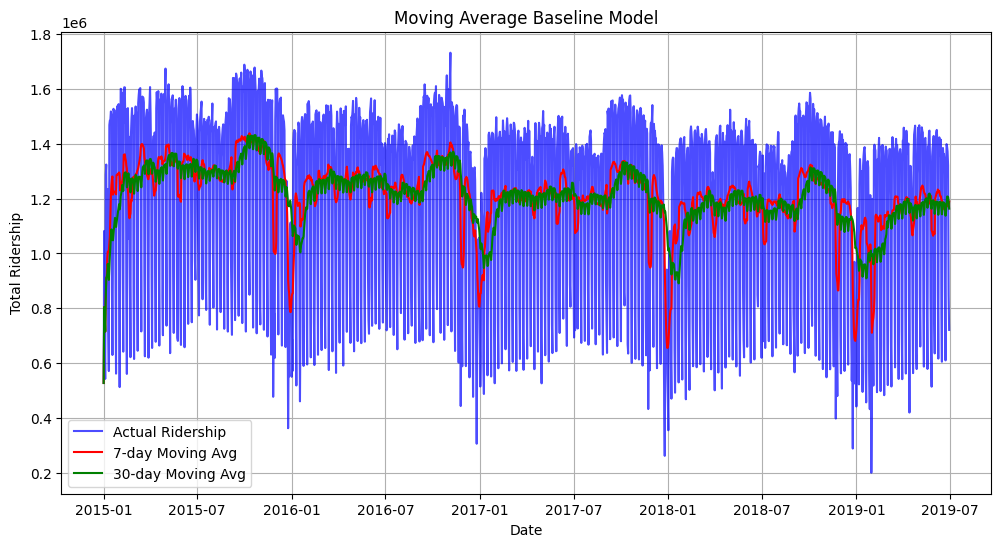

In [28]:
# ========================
# 3. MOVING AVERAGE BASELINE
# ========================
df["moving_avg_7"] = df.groupby("id")["rides"].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df["moving_avg_30"] = df.groupby("id")["rides"].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Compare actual vs. moving average
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped, label="Actual Ridership", color="blue", alpha=0.7)
plt.plot(df_grouped.index, df_grouped.rolling(window=7, min_periods=1).mean(), label="7-day Moving Avg", color="red")
plt.plot(df_grouped.index, df_grouped.rolling(window=30, min_periods=1).mean(), label="30-day Moving Avg", color="green")
plt.xlabel("Date")
plt.ylabel("Total Ridership")
plt.title("Moving Average Baseline Model")
plt.legend()
plt.grid()
plt.show()